# Cyber Security | Monoxor Task

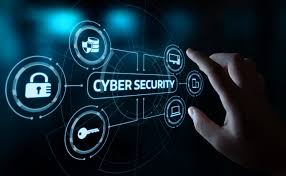

Problem Statement:
Lets assume you are part of the team developing cyber security product. This product protects web and mobile applications from runtime attacks. The way hackers attack keeps on changing constantly and thats where Machine Learning comes into the picture. Your task is to develop machine learning model which can identify if the request is safe or not.

In this data you will find the request payload and you will also find a field "isSafe" which basically tells if the request is safe or not for the app. We have looked at fields in each request and have marked a request as not safe if any of the fields contain malicious input from the user in to perform owasp top 10 attacks. Therefore, If value of isSafe is False, it means the request should be blocked. 

**Advanced expertise in both Information Security and Data Science will be necessary ingredient in enabling accurate discrimination between malicious and benign activity.** 

**Web and Mobile application logs require deep statistical analysis, which is accomplished in this notebook using machine learning and deep learning models.**

# Importing libraries

In [426]:
import json
from urllib.request import urlopen
import pandas as pd
import matplotlib.pyplot as plt

# Reading Data

Data is taken in csv format.

In [428]:
pd.set_option('display.max_columns',None)

In [429]:
df = pd.read_csv("/kaggle/input/network-requests-data/monoxor.csv")
df.head()

,req/baseUrl,req/body/note/title,req/body/note/desc,req/fresh,req/headers/host,req/headers/user-agent,req/headers/content-type,req/headers/org_id,req/headers/user_session_id,req/headers/accept,req/headers/content-length,req/headers/user/name,req/headers/user/role,req/hostname,req/ip,req/originalUrl,req/path,req/protocol,req/secure,req/stale,req/subdomains/0,req/xhr,isSafe
0,/crm/note,Tina Johnson,Top recognize eat. Fact whom spend area thing ...,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,sam,sales1,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,crm,False,True
1,/crm/note,Clayton Cooper,As possible American many prepare four strong....,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,sam,sales1,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,crm,False,True
2,/crm/note,Curtis Wolfe,Tuesday Notes or 2 like 2 XSP Class,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,sam,sales1,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,crm,False,False
3,/crm/note,Laura Fisher,State third represent energy campaign not forg...,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,sam,sales1,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,crm,False,True
4,/crm/note,Tyler Santos,Us enjoy since. Time identify image position o...,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,sam,sales1,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,crm,False,False


# EDA

In [430]:
df.describe(include = 'all')

,req/baseUrl,req/body/note/title,req/body/note/desc,req/fresh,req/headers/host,req/headers/user-agent,req/headers/content-type,req/headers/org_id,req/headers/user_session_id,req/headers/accept,req/headers/content-length,req/headers/user/name,req/headers/user/role,req/hostname,req/ip,req/originalUrl,req/path,req/protocol,req/secure,req/stale,req/subdomains/0,req/xhr,isSafe
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000.0,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1,994,750,1,1,1,1,1,1,1,NaN,1,1,1,1,1,1,1,1,1,1,1,2
top,/crm/note,Michael Smith,note title <title onPropertyChange title onPro...,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,NaN,sam,sales1,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,crm,False,True
freq,1000,3,36,1000,1000,1000,1000,1000,1000,1000,NaN,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,572
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Features with unique values are: **Body Title, Body Description and isSafe** features.

All the **other features** have a single value, which means that **they can't be used** to detect if the request is an attack by a hacker or not.

In [431]:
df_new = df[['req/body/note/title', 'req/body/note/desc', 'isSafe']]

df_new.head()

,req/body/note/title,req/body/note/desc,isSafe
0,Tina Johnson,Top recognize eat. Fact whom spend area thing ...,True
1,Clayton Cooper,As possible American many prepare four strong....,True
2,Curtis Wolfe,Tuesday Notes or 2 like 2 XSP Class,False
3,Laura Fisher,State third represent energy campaign not forg...,True
4,Tyler Santos,Us enjoy since. Time identify image position o...,False


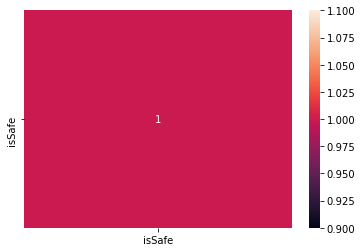

In [432]:
sns.heatmap(df_new.corr(), annot = True)

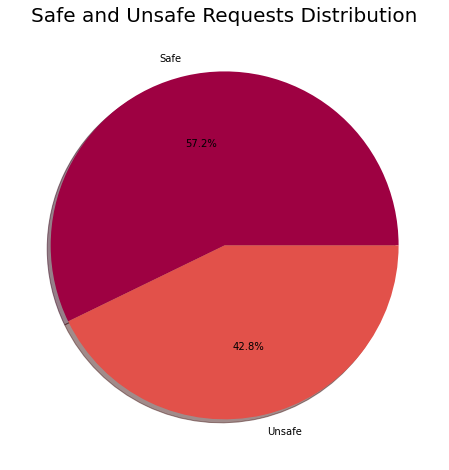

In [433]:
mylabels='Safe','Unsafe'
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

plt.figure(figsize=(16,8))

plt.title("Safe and Unsafe Requests Distribution", size = 20)
plt.pie(df_new['isSafe'].value_counts(), labels=mylabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

There are **more safe requests.**

In [434]:
not_safe = df_new['isSafe'].isin([False])
df_not_safe = df_new[not_safe].reset_index(drop=True)

df_not_safe = pd.DataFrame(df_not_safe)
df_not_safe

,req/body/note/title,req/body/note/desc,isSafe
0,Curtis Wolfe,Tuesday Notes or 2 like 2 XSP Class,False
1,Tyler Santos,Us enjoy since. Time identify image position o...,False
2,Tracy Smith,Area single occur chair opportunity art many. ...,False
3,Jacob Martin,note title <title onPropertyChange title onPro...,False
4,Colleen Riggs,"Meeting "")) or ((""x""))=((""x Notes 12:30",False
...,...,...,...
423,Gary Ruiz,"<img src=1 href=1 onerror=""javascript:alert(1)...",False
424,Jordan Brown,"Meeting "")) or ((""x""))=((""x Notes 12:30",False
425,Larry Perez,ext1%3Cvideo+src%3D1+href%3D1+onerror%3D%22jav...,False
426,Jason Tucker,ext1%3Cvideo+src%3D1+href%3D1+onerror%3D%22jav...,False


In [435]:
safe = df_new['isSafe'].isin([True])
df_safe = df_new[safe].reset_index(drop=True)

df_safe

,req/body/note/title,req/body/note/desc,isSafe
0,Tina Johnson,Top recognize eat. Fact whom spend area thing ...,True
1,Clayton Cooper,As possible American many prepare four strong....,True
2,Laura Fisher,State third represent energy campaign not forg...,True
3,Kevin Gonzalez,Resource politics already close phone special ...,True
4,James Taylor,Truth care red give all own. Full better marke...,True
...,...,...,...
567,James Smith,Mr support color history natural PM. Informati...,True
568,Bridget Elliott,Recently crime before five thought bit. Card f...,True
569,Jasmine Gibson,Set nature they then low resource truth. Edge ...,True
570,Mr. Antonio Valdez DDS,Push case them such face suffer. Letter middle...,True


There are **428 unsafe requests** and **572 safe requests.**

### Maliciuos Words in Safe and Unsafe requests.

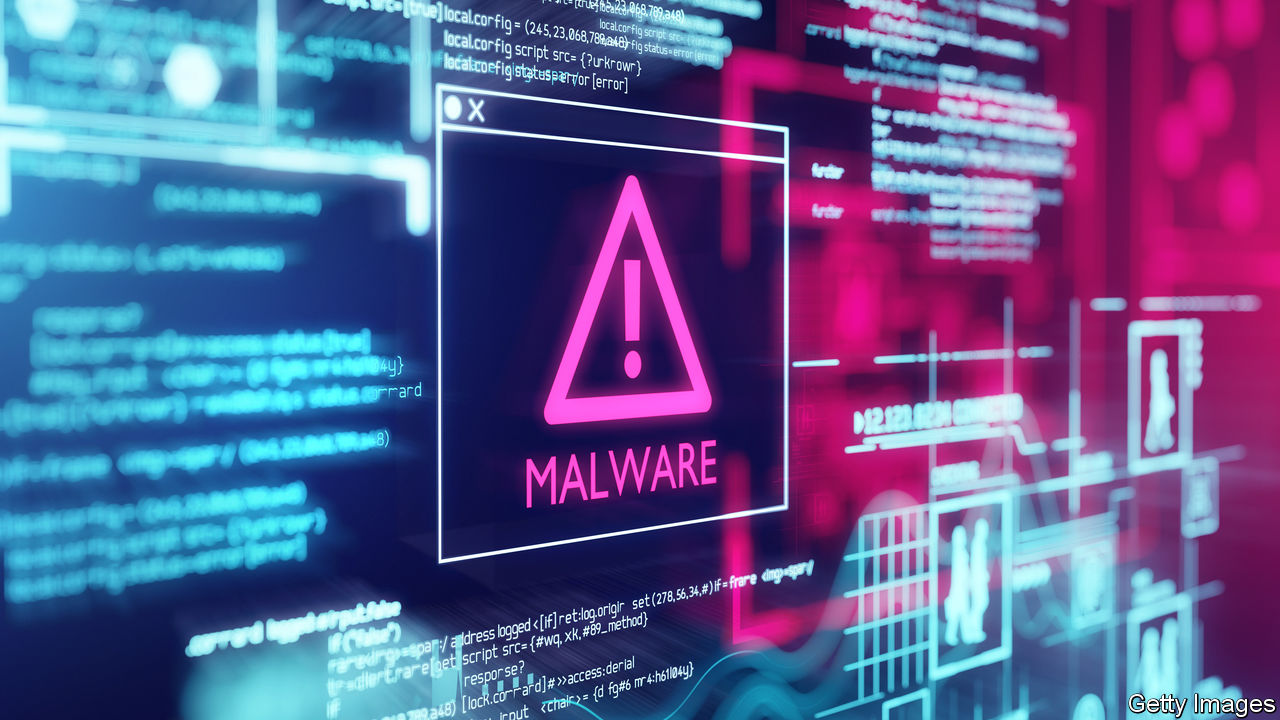

In [436]:
import string
string.punctuation
def remove_punctuation(text):
    no_punct = [word for word in text if not word.isalpha()]
    no_punct = [word for word in no_punct if word!= '.']
    words_wo_punct = ''.join(no_punct)
   
    return words_wo_punct
mal_words_ns = df_not_safe['req/body/note/desc'].apply(lambda x: remove_punctuation(x))
print(mal_words_ns)

0                                     2  2  
1                          \r\n             
2                              \r\n         
3                          <   ="::(1)"></ >
4                     "))  ((""))=(("  12:30
                       ...                  
423                      < =1 =1 =":(1)"></>
424                   "))  ((""))=(("  12:30
425    1%3+%31+%31+%3%22%3%281%29%22%3%3%2%3
426    1%3+%31+%31+%3%22%3%281%29%22%3%3%2%3
427                      < =1 =1 =":(1)"></>
Name: req/body/note/desc, Length: 428, dtype: object


In [437]:
mal_words_ns.index = np.arange(len(mal_words_ns))

corpus_mal_words = []

for i in (range(len(mal_words_ns))):
  review = mal_words_ns[i]
  review = review.lower()
  review = review.split()
  
  if len(review) > 0:
      corpus_mal_words.append(review)
corpus_mal_words

[['2', '2'],
 ['<', '="::(1)"></', '>'],
 ['"))', '((""))=(("', '12:30'],
 ['--><!--', '-->>', '<', '=:', '=:(1)>', '-->'],
 ['1%3+%31+%31+%3%22%3%281%29%22%3%3%2%3'],
 ['<', '=1', '=1', '=":(1)"></>'],
 ['"))', '((""))=(("', '12:30'],
 ['"))', '((""))=(("', '12:30'],
 ['<', '="::(1)"></', '>'],
 ['1<', '=1', '=1', '=":(1)"></>'],
 ['<', '="::(1)"></', '>'],
 ['<\x13=', '=":(1)">'],
 ['"/*'],
 ['"/*'],
 ['<\x13=', '=":(1)">'],
 ['"))', '((""))=(("', '12:30'],
 ['1%3+%31+%31+%3%22%3%281%29%22%3%3%2%3'],
 ['1<', '=1', '=1', '=":(1)"></>'],
 ['1<', '=1', '=1', '=":(1)"></>'],
 ['"))', '((""))=(("', '12:30'],
 ['<', '=1', '=1', '=":(1)"></>'],
 ['"))', '((""))=(("', '12:30'],
 ['1<', '=1', '=1', '=":(1)"></>'],
 ['1<', '=1', '=1', '=":(1)"></>'],
 ['--><!--', '-->>', '<', '=:', '=:(1)>', '-->'],
 ['<\x13=', '=":(1)">'],
 ['1%3+%31+%31+%3%22%3%281%29%22%3%3%2%3'],
 ['1%3+%31+%31+%3%22%3%281%29%22%3%3%2%3'],
 ['2', '2'],
 ['2', '2'],
 ['<', '="::(1)"></', '>'],
 ['<', '="::(1)"></', '>'],
 [

In [438]:
print(len(corpus_mal_words))

259


These are the malicious words in unsafe requests.

In [439]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [440]:
import string
string.punctuation
def remove_punctuation(text):
    no_punct = [word for word in text if not word.isalpha()]
    no_punct = [word for word in no_punct if word!= '.']
    words_wo_punct = ''.join(no_punct)
   
    return words_wo_punct
mal_words_s = df_safe['req/body/note/desc'].apply(lambda x: remove_punctuation(x))
print(mal_words_s)

0              \r\n         \r\n         
1                                        
2                             \r\n       
3                                        
4                             \r\n       
                      ...                
567                                      
568                                      
569                          \r\n        
570                       \r\n           
571                                      
Name: req/body/note/desc, Length: 572, dtype: object


In [441]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_new['isSafe'] = le.fit_transform(df_new['isSafe']) 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [442]:
df_new.head()

,req/body/note/title,req/body/note/desc,isSafe
0,Tina Johnson,Top recognize eat. Fact whom spend area thing ...,1
1,Clayton Cooper,As possible American many prepare four strong....,1
2,Curtis Wolfe,Tuesday Notes or 2 like 2 XSP Class,0
3,Laura Fisher,State third represent energy campaign not forg...,1
4,Tyler Santos,Us enjoy since. Time identify image position o...,0


### **Adding description length as a feature.**

In [443]:
df_new['desc length'] = df_new['req/body/note/desc'].astype(str).apply(len)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [444]:
df_new.head()

,req/body/note/title,req/body/note/desc,isSafe,desc length
0,Tina Johnson,Top recognize eat. Fact whom spend area thing ...,1,182
1,Clayton Cooper,As possible American many prepare four strong....,1,155
2,Curtis Wolfe,Tuesday Notes or 2 like 2 XSP Class,0,35
3,Laura Fisher,State third represent energy campaign not forg...,1,183
4,Tyler Santos,Us enjoy since. Time identify image position o...,0,176


In [445]:
y = df_new['isSafe']
X = df_new.drop(columns = 'isSafe')

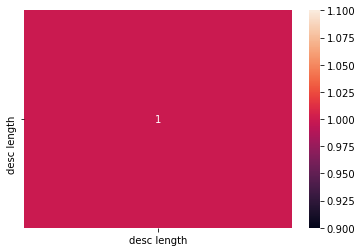

In [446]:
import seaborn as sns
sns.heatmap(X.corr(), annot = True)

# Bag of Words Model

In [447]:
print("Shape of X: " , X.shape)
print("Shape of y: " , y.shape)

Shape of X:  (1000, 3)
Shape of y:  (1000,)


In [448]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Creating corpus after removing stopwords.**

In [449]:
X.index = np.arange(len(X))
corpus = []
from tqdm import tqdm
for i in tqdm(range(len(X))):
  review = X['req/body/note/desc'][i]
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)


100%|██████████| 1000/1000 [00:00<00:00, 1201.23it/s]


In [450]:
corpus

['top recogn eat. fact spend area thing material. war recent also messag four billion. water deep. word amount tabl entire. drug sever amount live newspaper.',
 'possibl american mani prepar four strong. visit care organ everyon kitchen develop magazine. rang realiz direct wife capit move.',
 'tuesday note 2 like 2 xsp class',
 'state third repres energi campaign forget there. experi send heart suggest. studi paper common car kitchen it. time manag tree. real like agenc rule.',
 'us enjoy since. time identifi imag posit ok best. box throw yeah without. left explain author protect throw artist lot fly. thing year approach miss bank.',
 'area singl occur chair opportun art many. alon paper discuss may purpos though far. remain cours ready. sell growth memori look ask clear.',
 'resourc polit alreadi close phone special bit. million care yet mouth discuss stock total. entir import earli might.',
 'note titl <titl onpropertychang titl onpropertychange="javascript:javascript:alert(1)"></tit

In [451]:
from sklearn.feature_extraction.text import CountVectorizer as CV
cv  = CV(max_features = 100,ngram_range=(1,1))

X_cv = cv.fit_transform(corpus).toarray()
y = y.values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cv, y, test_size = 0.20, random_state = 0)
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn import metrics
acc = accuracy_score(y_test, y_pred)
print("Accuracy of the classifier: ",acc)
print("Confusion matrix is :\n",metrics.confusion_matrix(y_test,y_pred))
print("Classification report: \n" ,metrics.classification_report(y_test,y_pred))

Accuracy of the classifier:  0.84
Confusion matrix is :
 [[ 49  32]
 [  0 119]]
Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.60      0.75        81
           1       0.79      1.00      0.88       119

    accuracy                           0.84       200
   macro avg       0.89      0.80      0.82       200
weighted avg       0.87      0.84      0.83       200



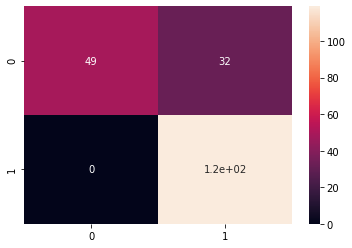

In [452]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True)

In [453]:
acc

0.84

An accuracy score of **84%**.

# TF-IDF Technique

Term Frequency - Inverse Document Frequency is used to measure the originality of a word. It converts sentences to vectors(after tokenization, stemming/lemmatization).

Bag of Words technique doesn't provide us with the semantic meaning of the word, here TF-IDF comes in play as it provides us the semantic meaning of the word.

In [454]:
from sklearn.feature_extraction.text import TfidfVectorizer as TV
tv  = TV(ngram_range =(1,1),max_features = 3000)
X_tv = tv.fit_transform(corpus).toarray()

In [455]:
X_train, X_test, y_train, y_test = train_test_split(X_tv, y, test_size = 0.20, random_state = 0)
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)


MultinomialNB()

In [456]:
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)

In [457]:
acc

0.84

Same accuracy as that of Bag of Words Technique, **84%**.

# Deep Learning Model

In [458]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dropout


In [459]:
tokenizer = Tokenizer(num_words = 100)
tokenizer.fit_on_texts(corpus)

In [460]:
sequences = tokenizer.texts_to_sequences(corpus)
padded = pad_sequences(sequences, padding='post')

In [461]:
word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1

These are the top 11 most frequent words.

In [462]:
embedding_dim = 64
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(100, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, None, 64)          6400      
_________________________________________________________________
global_average_pooling1d_18  (None, 64)                0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 6)                 390       
_________________________________________________________________
dropout_6 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 7         
Total params: 6,797
Trainable params: 6,797
Non-trainable params: 0
___________________________________________________

In [463]:
num_epochs = 10

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [464]:
m = model.fit(padded,y,epochs= num_epochs,validation_split=0.2)

Epoch 1/10
25/25 [==============================] - 0s 7ms/step - loss: 0.6841 - accuracy: 0.6087 - val_loss: 0.6710 - val_accuracy: 0.6900
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.6875 - val_loss: 0.6396 - val_accuracy: 0.7500
Epoch 3/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6340 - accuracy: 0.7287 - val_loss: 0.6022 - val_accuracy: 0.7850
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: 0.5901 - accuracy: 0.7588 - val_loss: 0.5459 - val_accuracy: 0.7850
Epoch 5/10
25/25 [==============================] - 0s 2ms/step - loss: 0.5503 - accuracy: 0.7850 - val_loss: 0.5102 - val_accuracy: 0.8450
Epoch 6/10
25/25 [==============================] - 0s 2ms/step - loss: 0.5099 - accuracy: 0.8050 - val_loss: 0.4773 - val_accuracy: 0.8450
Epoch 7/10
25/25 [==============================] - 0s 2ms/step - loss: 0.4853 - accuracy: 0.8125 - val_loss: 0.4545 - val_accuracy: 0.8450
Epoch 8/10
25/25 [==

This deep learning model has a **test accuracy of 84.5%**.

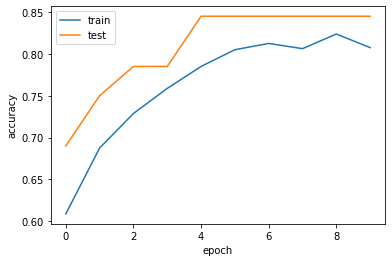

In [465]:
plt.plot(m.history['accuracy'])
plt.plot(m.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Making a single prediction

In [466]:
test = "Tuesday Notes or 2 like 2 XSP Class"
test = tokenizer.texts_to_sequences([test])
padded = pad_sequences(test, padding='post')
pred = int(model.predict(test).round().item())

if(pred==0):
    print('Not Safe')
else:
    print('Safe')

Not Safe


The prediction is correct.

# Conclusion

The best accuracy achieved is **84.5%.**

The main feature over which the safety is measured is the description feature. The concept of Natural Language Processing has been applied in order to analyse this feature, and create the learning model.

All the three models, Bag of Words model, TF-IDF model have a **test accuracy of 84%** and Deep Learning model has **test accuracy of 84.5%** .